# Using the Bag of Words Model and Beyond

## Understanding the bag of words model

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['comp.graphics', 'misc.forsale', 
              'rec.autos', 'sci.space']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(
    twenty_train.data)

print("BOW shape:", X_train_counts.shape)
caltech_idx = count_vect.vocabulary_['caltech']
print('"Caltech": %i' % X_train_counts[0, caltech_idx]) 

BOW shape: (2356, 34750)
"Caltech": 3


## Working with n-grams

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['sci.space']

twenty_train = fetch_20newsgroups(subset='train', 
                                  categories=categories, 
                                  remove=('headers', 
                                          'footers', 
                                          'quotes'),
                                  shuffle=True, 
                                  random_state=42)

count_chars = CountVectorizer(analyzer='char_wb', 
                              ngram_range=(3,3), 
                              max_features=10)

count_chars.fit(twenty_train['data'])

count_words = CountVectorizer(analyzer='word', 
                              ngram_range=(2,2),
                              max_features=10,
                              stop_words='english')

count_words.fit(twenty_train['data'])

X = count_chars.transform(twenty_train.data)

print(count_chars.get_feature_names_out())
print(X[1].todense())
print(count_words.get_feature_names_out())

[' an' ' in' ' of' ' th' ' to' 'he ' 'ing' 'ion' 'nd ' 'the']
[[0 0 2 5 1 4 2 2 0 5]]
['anonymous ftp' 'commercial space' 'gamma ray' 'nasa gov'
 'national space' 'remote sensing' 'sci space' 'space shuttle'
 'space station' 'washington dc']


## Implementing TF-IDF transformations

In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import *

categories = ['comp.graphics', 'misc.forsale', 
              'rec.autos', 'sci.space']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, 
                                  shuffle=True, 
                                  random_state=42)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(
    twenty_train.data)

tfidf = TfidfTransformer().fit(X_train_counts)
X_train_tfidf = tfidf.transform(X_train_counts)

caltech_idx = count_vect.vocabulary_['caltech']
print('"Caltech" scored in a BOW:')
print('count: %0.3f' % X_train_counts[0, caltech_idx])
print('TF-IDF: %0.3f' % X_train_tfidf[0, caltech_idx])

"Caltech" scored in a BOW:
count: 3.000
TF-IDF: 0.123


In [4]:
import numpy as np
count = np.mean(X_train_counts[X_train_counts>0])
tfif = np.mean(X_train_tfidf[X_train_tfidf>0])
print('mean count: %0.3f' % np.mean(count))
print('mean TF-IDF: %0.3f' % np.mean(tfif))

mean count: 1.698
mean TF-IDF: 0.064


# Working with Graph Data

## Using NetworkX basics

In [5]:
import networkx as nx

G = nx.cycle_graph(10)
A = nx.adjacency_matrix(G)

print(A.todense())

[[0 1 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 1 0]]


C:\Users\John\AppData\Local\Temp\ipykernel_3820\2536115678.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


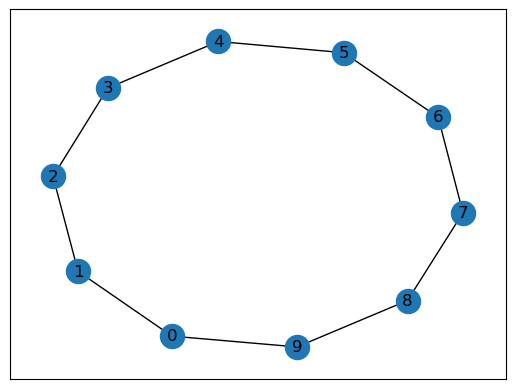

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
nx.draw_networkx(G)
plt.show()

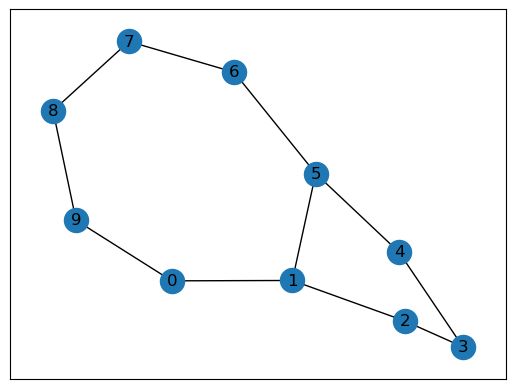

In [7]:
G.add_edge(1,5)
nx.draw_networkx(G)
plt.show()